# RNN 1st try:
Input: magnetic strength, angle, angular velocity.
Output: Angular acceleration


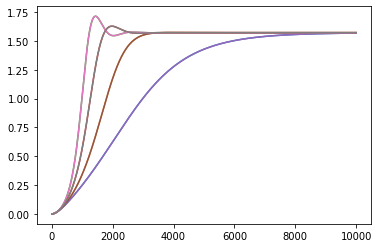

In [21]:
%clear
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.metrics import mean_squared_error


from Euler_approximation import euler #import euler approximation

[a1,a2,a3,a4]=[20,40,60,80] 
[phi1_a1,phi2_a1]=euler(a1)
[phi1_a2,phi2_a2]=euler(a2)
[phi1_a3,phi2_a3]=euler(a3)
[phi1_a4,phi2_a4]=euler(a4)


plt.plot(phi1_a1)
plt.plot(phi1_a2)
plt.plot(phi1_a4)
plt.plot(phi1_a3)

In [39]:
[a1,a2,a3,a4]=[20,40,60,80] # four sets of magnetic field strength 
 # Get data sequence through Euler approximatiion
[phi1_a1,phi2_a1]=euler(a1)
[phi1_a2,phi2_a2]=euler(a2)
[phi1_a3,phi2_a3]=euler(a3)
[phi1_a4,phi2_a4]=euler(a4)

split_time =8000
T=10000
di=0.001
#Put all angle sequence together
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)

 # Calculate the angular velocity
phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di
phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)

 # Calculate the angular acceleration
phi2_diff_all=np.concatenate((phi2_a1[1:split_time+1]-phi2_a1[:split_time],phi2_a2[1:split_time+1]-phi2_a2[:split_time],
                              phi2_a3[1:split_time+1]-phi2_a3[:split_time],phi2_a4[1:split_time+1]-phi2_a4[:split_time]),axis=0)
phi2_diff_all=phi2_diff_all/di

input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)
input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)

series_input=np.stack((input,phi1_all,phi2_all,phi2_diff_all),axis=1)
series_input=series_input.reshape(4,split_time,4)
x_train=series_input[:,:,0:3].reshape(4,split_time,3)
y_train=series_input[:,:,3]

# print(np.shape(series))
# print(np.shape(x_train))
# print(np.shape(input_set))
# print(x_difference)
# #print(x_train)
# print(np.shape(x_difference))

In [27]:
y_train


array([[ 0.00000000e+00,  1.56800000e+00,  1.55897867e+00, ...,
        -8.59081117e-03, -8.58441074e-03, -8.57801485e-03],
       [ 0.00000000e+00,  1.56800000e+00,  1.55897867e+00, ...,
        -1.37223566e-07, -1.36779477e-07, -1.36176465e-07],
       [ 0.00000000e+00,  1.56800000e+00,  1.55897867e+00, ...,
         4.39648318e-08,  4.37427872e-08,  4.37054660e-08],
       [ 0.00000000e+00,  1.56800000e+00,  1.55897867e+00, ...,
         2.90878432e-08,  2.90878432e-08,  2.86646539e-08]])

In [15]:
#test four input a=10, 30, 50, 70. 
sampling_time=0.01
interval=1
split_time =4000
shift=1
length=np.int(split_time/interval)


[a1_test,a2_test,a3_test,a4_test]=[10,30,50,70]
[phi1_a1_test,phi2_a1_test,sphi1_a1_test,sphi2_a1_test]=function(a1_test)
[phi1_a2_test,phi2_a2_test,sphi1_a2_test,sphi2_a2_test]=function(a2_test)
[phi1_a3_test,phi2_a3_test,sphi1_a3_test,sphi2_a3_test]=function(a3_test)
[phi1_a4_test,phi2_a4_test,sphi1_a4_test,sphi2_a4_test]=function(a4_test)

phi1_all_test=np.concatenate((phi1_a1_test,phi1_a2_test,phi1_a3_test,phi1_a4_test),axis=0)
phi1_all_test=phi1_all_test/sampling_time


input_a1_test=a1_test*np.ones(T)
input_a2_test=a2_test*np.ones(T)
input_a3_test=a3_test*np.ones(T)
input_a4_test=a4_test*np.ones(T)

input_test=np.concatenate((input_a1_test,input_a2_test,input_a3_test,input_a4_test),axis=0)
input_test=input_test.reshape(4,T,1)
input_test=input_test[:,:split_time:interval].reshape(4*length)


#input_a1_test[:split_time]=np.concatenate((input_a1_test[:2000],input_a4_test[2000:split_time]),axis=0)
# series_input_test=np.stack((phi1_a1_test[:split_time], phi2_a1_test[:split_time], input_a1_test[:split_time]),axis=1)

# x_test=series_input_test.reshape(split_time,3)
# y_test=phi2_a1_test[1:split_time+1]-phi2_a1_test[:split_time]

#Shuffle the data
series_input_test=np.stack((input_a1_test[:split_time],phi1_a1_test[:split_time], phi2_a1_test[:split_time],(phi2_a1_test[1:split_time+1]-phi2_a1_test[:split_time])/di),axis=1)
series_input_test=series_input_test.reshape(1,split_time,4)
x_test=series_input_test[:,:,0:3]
y_test=series_input_test[:,:,3]

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
# window_size = 64
# batch_size = 256

# train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# input_set = windowed_dataset(input, window_size, batch_size, shuffle_buffer_size)
# print(train_set)
# print(x_train.shape)

#initializer = tf.keras.initializers.Ones()
# model = tf.keras.models.Sequential([tf.keras.layers.SimpleRNN(60, return_sequences=True, input_shape=[None, 3]),
#                                     tf.keras.layers.SimpleRNN(20, return_sequences=True),
#                                     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(60,input_shape=(None,3),return_sequences=True),  
  tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# input_layer = tf.keras.layers.Input(shape=(None,1),batch_size=1)

# cell = tf.keras.layers.LSTMCell(
#     3,
#     kernel_initializer='glorot_uniform',
#     recurrent_initializer='glorot_uniform',
#     bias_initializer='zeros',
# )

# lstm = tf.keras.layers.RNN(
#     cell,
#     return_state=True,
#     return_sequences=True,
#     stateful=True
#      )

# lstm_out, hidden_state, cell_state = lstm(input_layer)

# #lstm_out, hidden_state, cell_state = tf.keras.layers.LSTM(3,return_state=True, return_sequences=True)(lstm_out)


# # output1 = tf.keras.layers.Dense(30, activation="elu")(lstm_out)
# # output = tf.keras.layers.Dense(3)(output1)

# output = lstm_out
# model = tf.keras.Model(
#     inputs=input_layer,
#     outputs=output
# )
# model = tf.keras.models.Sequential([
#        tf.keras.layers.LSTM(3, batch_input_shape=(1, 1, 3), return_sequences=True, stateful=True),
# #       tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,use_bias=False), 
# #       tf.keras.layers.TimeDistributed(Dense(32,activation='linear',use_bias=False)),     
#        tf.keras.layers.TimeDistributed(Dense(1))                   
# ])

# model = tf.keras.models.Sequential([
#        tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,activation='relu',use_bias=False),  
# #       tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,use_bias=False), 
# #       tf.keras.layers.TimeDistributed(Dense(32,activation='linear',use_bias=False)),     
#        tf.keras.layers.TimeDistributed(Dense(1,activation='relu',use_bias=False,kernel_initializer=initializer))                        
# ])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))

checkpoint_cb = tf. keras.callbacks.ModelCheckpoint("my_keras_model.h5")
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<1):
        print("\n 99% acc reached")
        self.model.stop_training = True

optimizer = tf.keras.optimizers.Adam(lr=1e-5)#, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, epochs=500)#,callbacks=[CustomCallbacks()])



Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 34.3175 - mae: 34.8175
Epoch 2/500
1/1 [==============================] - 3s 3s/step - loss: 33.2969 - mae: 33.7969
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 32.2778 - mae: 32.7778
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 31.2584 - mae: 31.7584
Epoch 5/500
1/1 [==============================] - 3s 3s/step - loss: 30.2373 - mae: 30.7374
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 29.2165 - mae: 29.7165
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 28.1951 - mae: 28.6951
Epoch 8/500


KeyboardInterrupt: 

In [50]:
model.save('RNN1.h5') 


In [52]:
model= tf.keras.models.load_model("RNN1.h5")
optimizer = tf.keras.optimizers.Adam(lr=1e-7)#, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, epochs=200)#,callbacks=[CustomCallbacks()])

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 0.2081 - mae: 0.3747
Epoch 2/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3746
Epoch 3/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3748
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3744
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3745
Epoch 6/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3746
Epoch 7/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3747
Epoch 8/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3747
Epoch 9/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3745
Epoch 10/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.3744
Epoch 11/200
1/1 [==============================] - 3s 3s/step - loss: 0.2081 - mae: 0.37

1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3734
Epoch 91/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3733
Epoch 92/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3733
Epoch 93/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3733
Epoch 94/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3733
Epoch 95/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3733
Epoch 96/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3733
Epoch 97/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3732
Epoch 98/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3732
Epoch 99/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3732
Epoch 100/200
1/1 [==============================] - 3s 3s/step - loss: 0.2077 - mae: 0.3732


1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3721
Epoch 179/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3721
Epoch 180/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 181/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 182/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 183/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 184/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 185/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 186/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 187/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae: 0.3720
Epoch 188/200
1/1 [==============================] - 3s 3s/step - loss: 0.2073 - mae

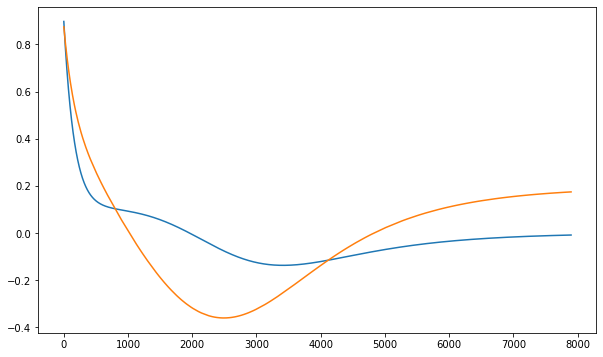

In [51]:
Predict=model.predict(x_train)

# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

plt.figure(figsize=(10, 6))
plt.plot(y_train[0,100:])
plt.plot(Predict[0,100:])

# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,0])
# plt.plot(Predict[0,:,0])
# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,1])
# plt.plot(Predict[0,:,1])
# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,0])
# plt.plot(Predict[0,:,0])

# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,1])
# plt.plot(Predict[0,:,1])

# plt.figure(figsize=(10, 6))
# plt.plot(y_test[0,:,2])
# plt.plot(Predict[0,:,2])

#rnn_forecast= model_forecast(model, 30, window_size) X-0-80  Y 80-100 sequence to s   s to p  y 81

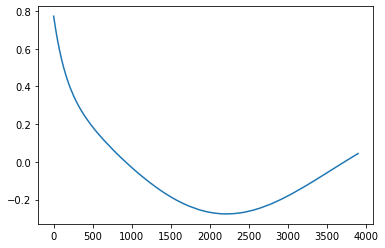

In [32]:
Predict.shape
plt.plot(Predict[0,100:])

In [29]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze() # "real" angle
x2=np.zeros((random_length)).squeeze() # "real" angular
x1_test=np.zeros((1, random_length)).squeeze()  # predicted angle
x2_test=np.zeros((1,random_length)).squeeze()  # predicted angular velocity

#Initialize the angle and angular velocity
x1[0]=0.1
x1[1]=0.1001
x2[0]=(x1[1]-x1[0])/di 

x1_test[0]=x1[0]
x2_test[0]=x2[0]

#representive torque parameters
c1=4.2816e-7
c2=1.568
c3=5.7534

#get the "real" angle sequence
for t in range(random_length-1):
    hinput=a_test*1000/(4*np.pi)
    x1[t+1]=x1[t]+di*x2[t]
    x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))
      
model1 = tf.keras.models.load_model("RNN1.h5")
dx1=np.zeros((1, random_length)).squeeze()  #The angular acceleration

#get the predicted angle sequence
for t in range(random_length-1):
    dx1[t]=model1.predict([[x1_test[t],x2_test[t],a_test]])
    x1_test[t+1]=x1_test[t]+x2_test[t]*di
    x2_test[t+1]=x2_test[t]+dx1[t]*di

error=np.abs(x1-x1_test) #Predition error
MAE_angle=np.mean(error) # The mean absolute error
print(MAE_angle)

 #plot figure
plt.figure(figsize=(7,5))
plt.plot(x1,"b",label="The actual angle ")
plt.plot(x1_test,"r", label="The predicted angle" )
plt.plot(error[:5000],"g",label="The prediction error")
plt.legend()
plt.text(-200,1.05,"The actual angle",weight="bold",color="blue")
plt.quiver(700, 1, 1, -1, color='b', width=0.005)
plt.text(1400,0.7,"The predicted angle",weight="bold",color="r")
plt.quiver(1400, 0.75, -1, 1, color='r', width=0.005)
plt.text(2000,0.2,"The prediction error",weight="bold",color="g")
plt.quiver(2500, 0.13, 1, -1, color='g', width=0.005)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Angle")

plt.savefig("Figures/angle.png")

ValueError: in user code:

    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\sunji\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 3)


In [25]:
Predict.shape

(4, 4000, 1)

In [ ]:
y_train.shape

In [ ]:
RNN_MSE_phi1_a1=mean_squared_error(x_train[0,:,0], Predict[0,:,0])
print(a1)
print(RNN_MSE_phi1_a1)


RNN_MSE_phi1_a2=mean_squared_error(x_train[1,:,0], Predict[1,:,0])
print(a2)
print(RNN_MSE_phi1_a2)


RNN_MSE_phi1_a3=mean_squared_error(x_train[2,:,0], Predict[2,:,0])
print(a3)
print(RNN_MSE_phi1_a3)


RNN_MSE_phi1_a4=mean_squared_error(x_train[3,:,0], Predict[3,:,0])
print(a4)
print(RNN_MSE_phi1_a4)




Test one input.  

In [ ]:
# a_test=53
# [phi1_test,phi2_test,sphi1_test,sphi2_test]=function(a_test)
# sphi1_test=sphi1_test/sampling_time

# input_test=a_test*np.ones(split_time)
# input_test=input_test[:split_time:interval]
# input_test=input_test.reshape(1,length,1)
# x_test= sphi1_test[:split_time:interval]

# trainPredict_test=model.predict(input_test)
# trainPredict_test=trainPredict_test.reshape(length)



# Predict_test=(x_test+trainPredict_test)*sampling_time
# #x_difference= x_difference.reshape(length,2)
# # plt.figure(figsize=(10, 6))
# # plot_series(range(length), x_difference[:,0])
# # plot_series(range(length), np.array(trainPredict[:,0]))

# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_test)
# plot_series(range(length), np.array(Predict_test))

**Test** four inputs a=10,30,50,70

In [ ]:
# #test four input a=10, 30, 50, 70. 
# [a1_test,a2_test,a3_test,a4_test]=[10,30,50,70]
# [phi1_a1_test,phi2_a1_test,sphi1_a1_test,sphi2_a1_test]=function(a1_test)
# [phi1_a2_test,phi2_a2_test,sphi1_a2_test,sphi2_a2_test]=function(a2_test)
# [phi1_a3_test,phi2_a3_test,sphi1_a3_test,sphi2_a3_test]=function(a3_test)
# [phi1_a4_test,phi2_a4_test,sphi1_a4_test,sphi2_a4_test]=function(a4_test)

# sphi1_all_test=np.concatenate((sphi1_a1_test,sphi1_a2_test,sphi1_a3_test,sphi1_a4_test),axis=0)
# sphi1_all_test=sphi1_all_test/sampling_time


# input_a1_test=a1_test*np.ones(T)
# input_a2_test=a2_test*np.ones(T)
# input_a3_test=a3_test*np.ones(T)
# input_a4_test=a4_test*np.ones(T)

# input_test=np.concatenate((input_a1_test,input_a2_test,input_a3_test,input_a4_test),axis=0)
# input_test=input_test.reshape(4,T,1)
# input_test=input_test[:,:split_time:interval]

# series_angle_test=sphi1_all_test.reshape(4,T,1)

# x_test =series_angle_test[:,:split_time:interval]

# testPredict = model.predict(input_test)
# testPredict=(x_test+testPredict)*sampling_time
# plt.figure(figsize=(10, 6))
# plt.title('a1_test')
# plot_series(range(length), x_test[0,:,0])
# plot_series(range(length), np.array(testPredict[0,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a2_test')
# plot_series(range(length), x_test[1,:,0])
# plot_series(range(length), np.array(testPredict[1,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a3_test')
# plot_series(range(length), x_test[2,:,0])
# plot_series(range(length), np.array(testPredict[2,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a4_test')
# plot_series(range(length), x_test[3,:,0])
# plot_series(range(length), np.array(testPredict[3,:,0]))


In [ ]:
# DENSE_MSE_phi1_a1_test=mean_squared_error(x_test[0,:,0], testPredict[0,:,0])
# print(a1_test)
# print(DENSE_MSE_phi1_a1_test)


# DENSE_MSE_phi1_a2_test=mean_squared_error(x_test[1,:,0], testPredict[1,:,0])
# print(a2_test)
# print(DENSE_MSE_phi1_a2_test)


# DENSE_MSE_phi1_a3_test=mean_squared_error(x_test[2,:,0], testPredict[2,:,0])
# print(a3_test)
# print(DENSE_MSE_phi1_a3_test)


# DENSE_MSE_phi1_a4_test=mean_squared_error(x_test[3,:,0], testPredict[3,:,0])
# print(a4_test)
# print(DENSE_MSE_phi1_a4_test)


In [ ]:
Q=np.zeros((100,100), dtype=np.int)
num_actions=100
for phi1 in range(90):
    for a in range(num_actions):
      if (phi1>70):
       Q[phi1, a]=100000+1000*a
      else: 
       Q[phi1, a]= np.abs(phi1-45)

In [ ]:
# #def qlearning(episodes):
discount_factor=0.9
alpha=0.9
epsilon=0.9
episodes=100

angle= np.zeros((1,episodes)).squeeze()
magnetic= np.zeros((1,episodes)).squeeze()
state=np.zeros((1,episodes), dtype=int).squeeze()
action_all=np.array([0,0])
for t in range(1,episodes-1):
    
    random_action=np.random.randint(1,100)         
    best_action =1+ np.argmax(Q[state[t]]) 
    action_probabilities=[epsilon/((1.0 - epsilon) / num_actions +epsilon), (1-epsilon)/num_actions/((1.0 - epsilon) / num_actions +epsilon)]
    action_list=[best_action, random_action]
    
    
    # choose action according to the probability distribution 
    action = np.random.choice(action_list, p=action_probabilities)
    action=np.array(action)
    input1=np.float(state[t])
    input2=np.float(state[t-1])
    input3=np.float(action)
    action_all=np.append(action_all, action)
    action_all=action_all.reshape(1,len(action_all),1)
    state_sequence=model.predict(action_all)
    state[t+1]=state_sequence[:,len(state_sequence)-1]
    reward= np.abs(state[t]-45)
    state[t+1]=np.round( state[t+1])
    best_next_action = np.argmax(Q[state[t+1]])  
    Q_target = reward + discount_factor * Q[state[t+1], best_next_action] 
    Q_delta = Q_target - Q[state[t],action]
    Q[state[t],action]+= alpha * Q_delta

    
    angle[t]= np.float(state[t])
    magnetic[t]=action
    

#     #return Q 

In [ ]:


angle=np.array(angle)
plot_series(range(episodes),angle)

np.set_printoptions(threshold=np.inf)
magnetic
#print(state)
#print(magnetic)
#print(Q)
print(state_sequence)

